<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.nus.edu.sg/images/default-source/base/logo.png' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Machine Learning in Python</h1><h2>Group Project </h2><h3>(8 Students per Group)</h3></th>
    </tr>
</table>

## Objectives
##### After completing this assignment, you should be able to:
1. Build Machine Learning Models to solve classification and regression problems
2. Extract and collect data online, clean and prepare the data, explore and understand the data.
2. Select, Train and Evaluate the machine learning models
3. Fine-tuning model hyperparameters using grid search or other suitable methods
4. Use the model to make predictions

## Datasets
Extract and collect data online to solve two problems:

1. Classification Problem
2. Regression Problem

#### Popular sources for machine learning datasets:

https://www.kaggle.com/datasets

https://archive.ics.uci.edu/ml/index.php

https://registry.opendata.aws/

https://datasetsearch.research.google.com/

https://msropendata.com/


## Instructions

The below template only provides you a basic structure for you to solve the problem. Feel free to **add in more cells** and include more steps where necessary to achieve the goal of the project.

## 1. Classification Problem:

### Step 1: Import Data and Perform Data Preparation & Exploration
Remember to split data into train data and test data

In [ ]:
# Enter your code here:


### Step 2: Select, Train, Evaluate and Fine Tuning the Models
Please shortlist two to five promissing models, provide details on how you fine-tuning the model hyperparameters (e.g. using Grid Saerch, Random Search and etc.). Feel free to add in more cells. 

In [ ]:
# Model 1
# Enter your code here:


In [ ]:
# Model 2
# Enter your code here:


In [ ]:
# Model 3 
# Enter your code here:


In [ ]:
# Model 4 (optional)
# Enter your code here:


In [ ]:
# Model 5 (optional)
# Enter your code here:



### Step 3: Recommend the Best Model and Explain the Reasons

Explain your answer here:



In [ ]:
# Enter your code here (if required):



### Step 4: Use the best model to make prediction
Make prediction on the test data and provide the error analysis on the results (e.g. confusion matrix, precision & recall and etc.)


In [ ]:
# Enter your code here:




### Step 5: Save the Best Model for Future Use

In [ ]:
# Enter your code here:



## 2. Regression Problem

### Step 1: Import Data and Perform Data Preparation & Exploration

In [83]:
# Enter your code here:

In [42]:
# Import the requried packages
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, neighbors, tree, svm, ensemble, neural_network
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate

import warnings

warnings.filterwarnings('ignore')

In [43]:
house = pd.read_csv('./MELBOURNE_HOUSE_PRICES_LESS.csv', encoding='utf-8')
house

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [44]:
dd = house[['Rooms', 'Type', 'Postcode', 'Propertycount', 'Distance', 'Price']]
dd

,Rooms,Type,Postcode,Propertycount,Distance,Price
0,3,h,3067,4019,3.0,1490000.0
1,3,h,3067,4019,3.0,1220000.0
2,3,h,3067,4019,3.0,1420000.0
3,3,h,3040,1543,7.5,1515000.0
4,2,h,3042,3464,10.4,670000.0
...,...,...,...,...,...,...
63018,3,h,3064,5833,20.6,566000.0
63019,3,h,3064,5833,20.6,500000.0
63020,3,h,3064,5833,20.6,545000.0
63021,3,u,3074,7955,15.3,NaN


In [45]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          63023 non-null  int64  
 1   Type           63023 non-null  object 
 2   Postcode       63023 non-null  int64  
 3   Propertycount  63023 non-null  int64  
 4   Distance       63023 non-null  float64
 5   Price          48433 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.9+ MB


In [46]:
dd['Type'].value_counts()

h    45053
u    11655
t     6315
Name: Type, dtype: int64

In [47]:
dd['Type'] = dd['Type'].map( {'h': 1, 'u': 2, 't' :3} ).astype(int)
dd.head()

,Rooms,Type,Postcode,Propertycount,Distance,Price
0,3,1,3067,4019,3.0,1490000.0
1,3,1,3067,4019,3.0,1220000.0
2,3,1,3067,4019,3.0,1420000.0
3,3,1,3040,1543,7.5,1515000.0
4,2,1,3042,3464,10.4,670000.0


In [48]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          63023 non-null  int64  
 1   Type           63023 non-null  int32  
 2   Postcode       63023 non-null  int64  
 3   Propertycount  63023 non-null  int64  
 4   Distance       63023 non-null  float64
 5   Price          48433 non-null  float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 2.6 MB


In [49]:
dd.isnull().sum()

Rooms                0
Type                 0
Postcode             0
Propertycount        0
Distance             0
Price            14590
dtype: int64

In [50]:
dd = dd.dropna(axis=0,subset = ['Price'])
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48433 entries, 0 to 63020
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          48433 non-null  int64  
 1   Type           48433 non-null  int32  
 2   Postcode       48433 non-null  int64  
 3   Propertycount  48433 non-null  int64  
 4   Distance       48433 non-null  float64
 5   Price          48433 non-null  float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 2.4 MB


In [51]:
dd.isnull().sum()

Rooms            0
Type             0
Postcode         0
Propertycount    0
Distance         0
Price            0
dtype: int64

In [52]:
dd.describe()

,Rooms,Type,Postcode,Propertycount,Distance,Price
count,48433.000000,48433.000000,48433.000000,48433.000000,48433.000000,4.843300e+04
mean,3.071666,1.397498,3123.210332,7566.399913,12.702761,9.978982e+05
std,0.944708,0.667194,125.534940,4457.405884,7.550030,5.934989e+05
min,1.000000,1.000000,3000.000000,39.000000,0.000000,8.500000e+04
25%,2.000000,1.000000,3051.000000,4280.000000,7.000000,6.200000e+05
50%,3.000000,1.000000,3103.000000,6567.000000,11.700000,8.300000e+05
75%,4.000000,2.000000,3163.000000,10412.000000,16.700000,1.220000e+06
max,31.000000,3.000000,3980.000000,21650.000000,55.800000,1.120000e+07


#### Pearson Correlation

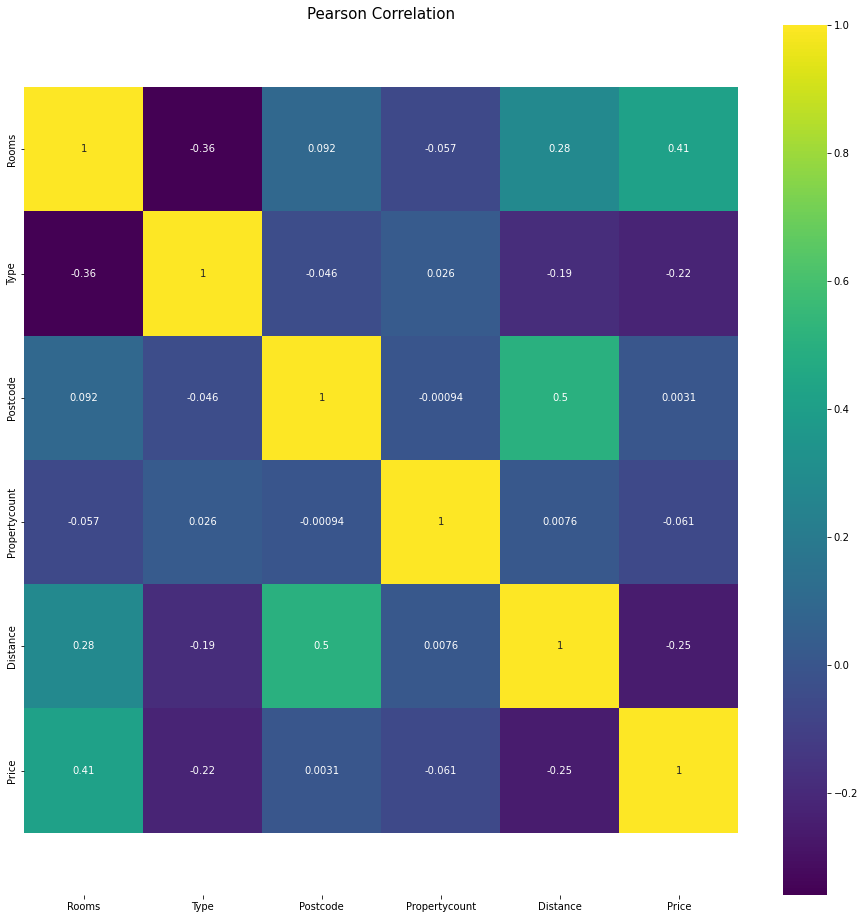

In [180]:
colormap = plt.cm.viridis
plt.figure(figsize=(16,16))
plt.title('Pearson Correlation', size=15)
ax = sns.heatmap(dd.corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# plt.savefig("Pearson Correlation.png",dpi=400)
plt.show()

#### Price correlation

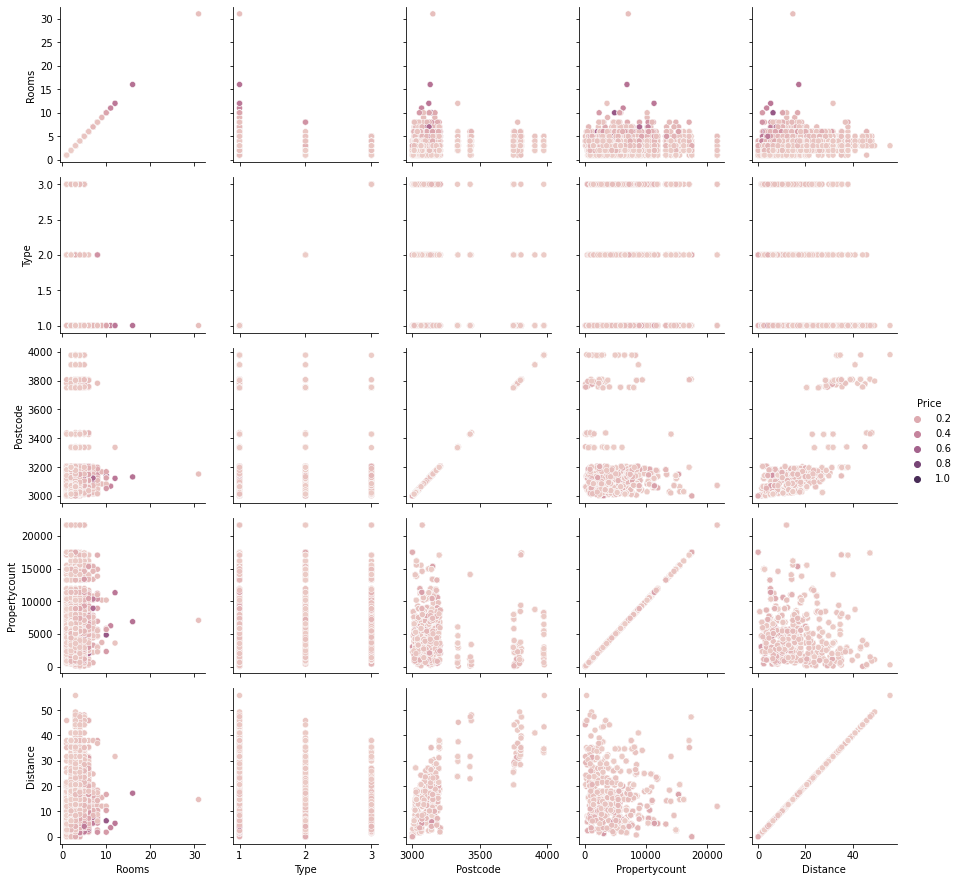

In [179]:
g = sns.PairGrid(data=dd, hue= 'Price', height=2.5)
g = g.map(sns.scatterplot)
g = g.add_legend()
# plt.savefig("Price correlation.png",dpi=400)

#### Boxplot

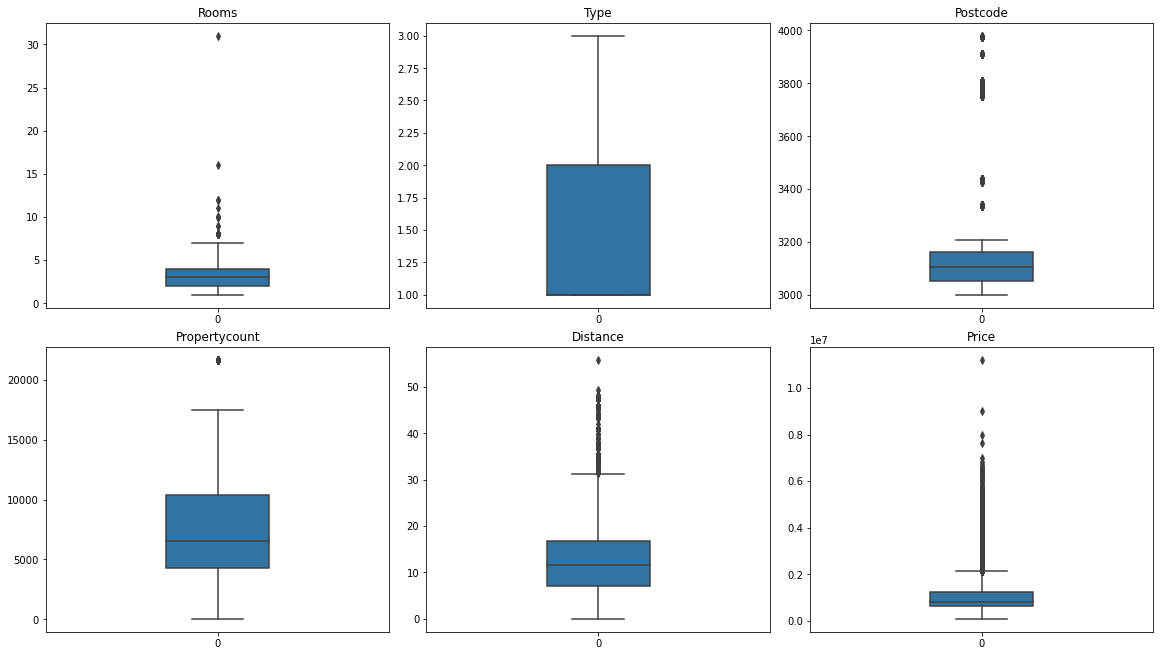

In [122]:
fig, ax =plt.subplots(2,3,constrained_layout=True, figsize=(16, 9))
axesSub = sns.boxplot(data=dd['Rooms'], ax=ax[0][0], width=0.3)
axesSub.set_title('Rooms')
axesSub = sns.boxplot(data=dd['Type'], ax=ax[0][1], width=0.3)
axesSub.set_title('Type')
axesSub = sns.boxplot(data=dd['Postcode'], ax=ax[0][2], width=0.3)
axesSub.set_title('Postcode')
axesSub = sns.boxplot(data=dd['Propertycount'], ax=ax[1][0], width=0.3)
axesSub.set_title('Propertycount')
axesSub = sns.boxplot(data=dd['Distance'], ax=ax[1][1], width=0.3)
axesSub.set_title('Distance')
axesSub = sns.boxplot(data=dd['Price'], ax=ax[1][2], width=0.3)
_ = axesSub.set_title('Price')

#### Scatterplot

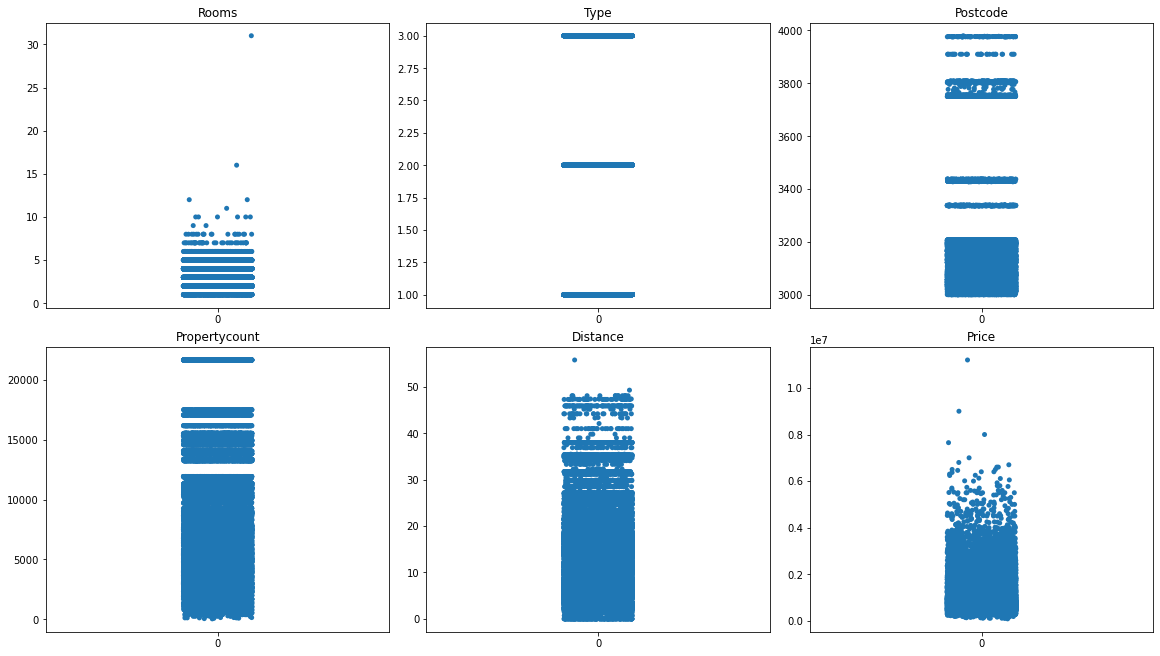

In [127]:
fig, ax =plt.subplots(2,3,constrained_layout=True, figsize=(16, 9))
axesSub = sns.stripplot(data=dd['Rooms'], ax=ax[0][0])
axesSub.set_title('Rooms')
axesSub = sns.stripplot(data=dd['Type'], ax=ax[0][1])
axesSub.set_title('Type')
axesSub = sns.stripplot(data=dd['Postcode'], ax=ax[0][2])
axesSub.set_title('Postcode')
axesSub = sns.stripplot(data=dd['Propertycount'], ax=ax[1][0])
axesSub.set_title('Propertycount')
axesSub = sns.stripplot(data=dd['Distance'], ax=ax[1][1])
axesSub.set_title('Distance')
axesSub = sns.stripplot(data=dd['Price'], ax=ax[1][2])
_ = axesSub.set_title('Price')

#### Lineplot(Price)

Text(0.5, 1.0, 'Price')

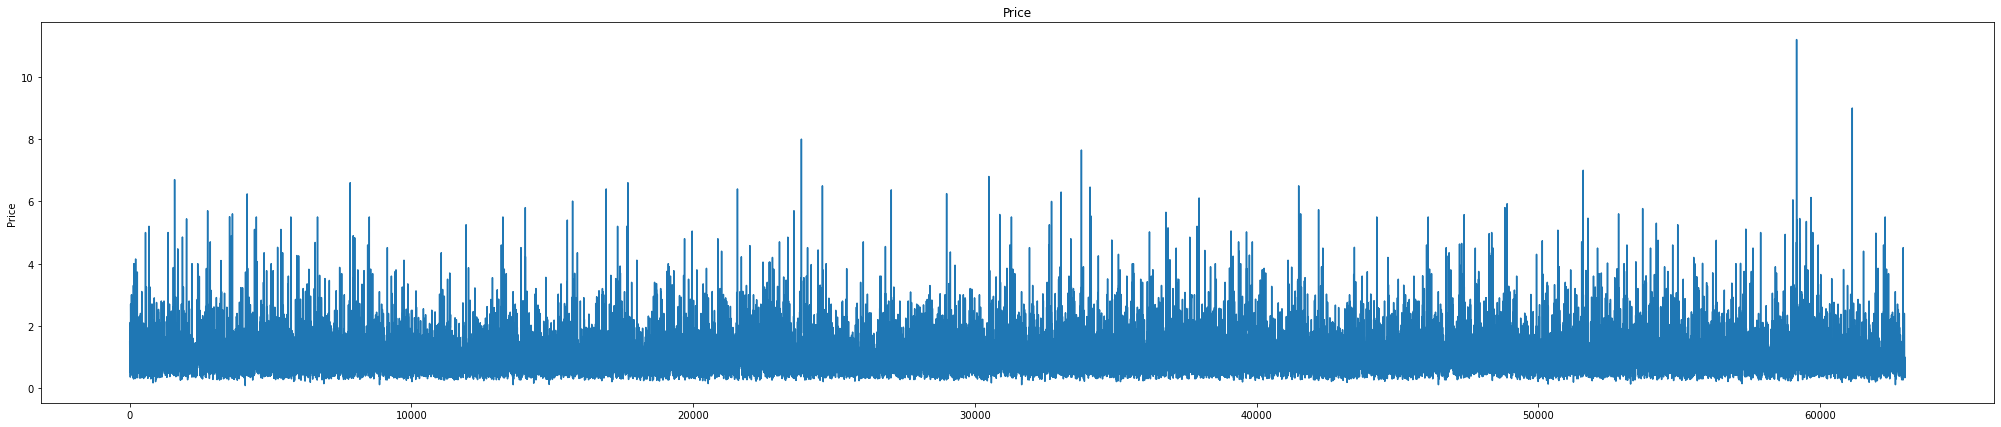

In [183]:
plt.figure(figsize=(35, 7))
ax = sns.lineplot(data=dd['Price'] / 1e6)
ax.set_title('Price')
# plt.savefig("Lineplot(Price).png",dpi=400)

#### Linear relation(Rooms VS Price)

<AxesSubplot:xlabel='Price', ylabel='Rooms'>

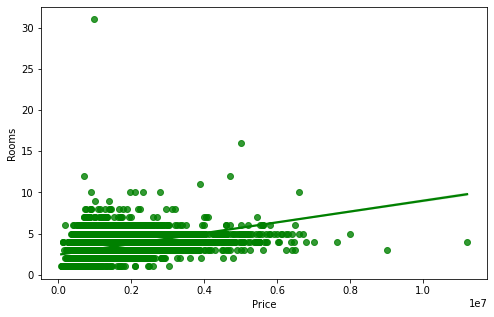

In [184]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Price',y='Rooms',data=dd, color='g')
# plt.savefig("Linear relation(Rooms VS Price).png",dpi=400)

#### Hist

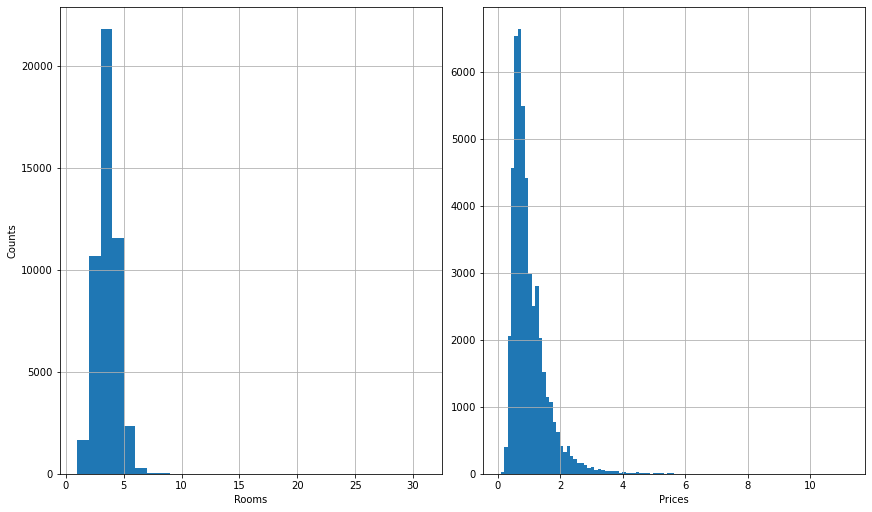

In [172]:
fig, ax =plt.subplots(1,2,constrained_layout=True, figsize=(12, 7))
ax[0].hist(dd['Rooms'], bins=30)
ax[0].set_xlabel('Rooms')
ax[0].set_ylabel('Counts') 
ax[0].grid(True)
ax[1].hist(dd['Price'] / 1e6, bins=100)
ax[1].set_xlabel('Prices')
ax[1].grid(True)

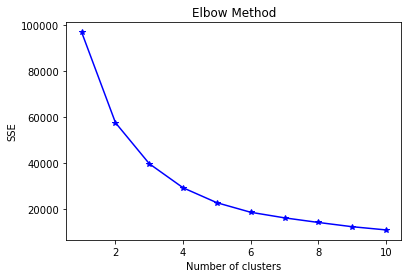

In [108]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#K-means clustering
cls=dd[["Rooms","Price"]]
# Convert dataframe into numpy arrays
X_ =cls.values
# Scaling the data so that all the features/attributes become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X_) 
# Task 3: Build Model: using Elbow Method to find the optimal K
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=1)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse, 'b-*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [109]:
# Build the model using the optimal n_cluster
kmeans = KMeans(n_clusters=4, n_init=20, random_state=1)
# Fit the model and assign each data point to the cluster
y_pred = kmeans.fit_predict(X_scaled) # fit and then predict

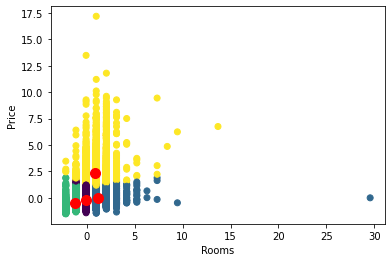

In [110]:
# Task 4: Visualise the Clusters
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

In [54]:
X = dd[['Rooms', 'Type', 'Postcode', 'Propertycount', 'Distance']]
y = dd['Price']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

### Step 2: Select, Train, Evaluate and Fine Tuning the Models
Please shortlist two to five promissing models, provide details on how you fine tuning the model hyperparameters (e.g. using Grid Saerch, Random Search and etc.). Feel free to add in more cells. 

In [57]:
# Model 1
# Enter your code here:

In [58]:
#Linear Regression Model
lm_reg = linear_model.LinearRegression()
lm_reg.fit(X_train, y_train)

LinearRegression()

In [59]:
# print out the model coefficients and intercept
print(lm_reg.coef_)
print(lm_reg.intercept_)

[ 288042.56712231  -79491.18006287  128063.08811904  -14553.00438391
 -309926.34398262]
997099.6198832839


In [60]:
#training mean absolute error
lm_train_mae = mean_absolute_error(lm_reg.predict(X_train), y_train)
print('LinearRegression training mean absolute error: ', lm_train_mae)

#testing mean absolute error
lm_test_mae = mean_absolute_error(lm_reg.predict(X_test), y_test)
print('LinearRegression testing mean absolute error: ', lm_test_mae)

LinearRegression training mean absolute error:  319730.5115872153
LinearRegression testing mean absolute error:  316274.58570426935


In [61]:
y_pred = lm_reg.predict(X_test)
y_pred

array([1282736.66468451, 1568738.24670802,  469554.83661808, ...,
        881907.7403013 , 1016033.21488212, 1128970.37289349])

Text(0, 0.5, 'y_pred')

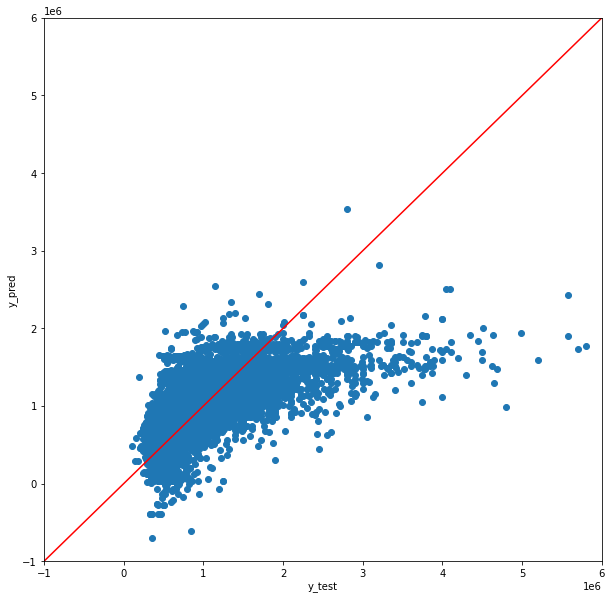

In [62]:
# Visualize y_test & y_pred
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.plot([-1000000, 6000000], [-1000000, 6000000], 'r-')
plt.xlim(-1000000, 6000000)
plt.ylim(-1000000, 6000000)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [63]:
# Model 2
# Enter your code here:

In [64]:
#Support Vector Machine Model
svm_reg = svm.SVR()

param_grid = {"kernel": ['linear', 'rbf'],
              "gamma" : [ 0.5,0.4,1,2,3,5], 
              'C' : [950,500,1000,1500]}

gs_reg = GridSearchCV(svm_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 5, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_reg.fit(X_train, y_train) 

print(gs_reg.best_estimator_)

SVR(C=1500, gamma=0.4)


In [65]:
svm_reg = gs_reg.best_estimator_
svm_reg.fit(X_train, y_train)

SVR(C=1500, gamma=0.4)

In [66]:
#training mean absolute error
svm_train_mae = mean_absolute_error(svm_reg.predict(X_train), y_train)
print('SVM mean absolute error: ', svm_train_mae)

#testing mean absolute error
svm_test_mae = mean_absolute_error(svm_reg.predict(X_test), y_test)
print('SVM testing mean absolute error: ', svm_test_mae)

SVM mean absolute error:  232196.14217121684
SVM testing mean absolute error:  231279.7140699382


In [67]:
y_pred = svm_reg.predict(X_test)
y_pred

array([ 945074.28550891, 1875960.64530872,  639065.66136856, ...,
        992283.00259507, 1156953.84292665,  580058.1011825 ])

Text(0, 0.5, 'y_pred')

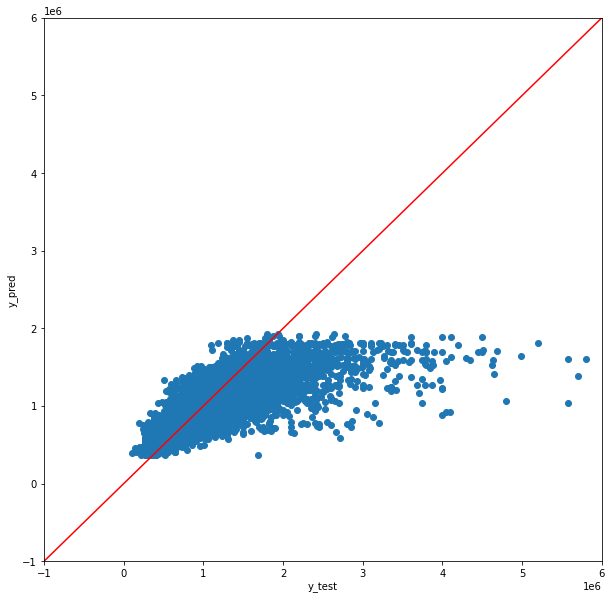

In [68]:
# Visualize y_test & y_pred
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.plot([-1000000, 6000000], [-1000000, 6000000], 'r-')
plt.xlim(-1000000, 6000000)
plt.ylim(-1000000, 6000000)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [27]:
# Model 3
# Enter your code here:

In [28]:
mlp_reg = neural_network.MLPRegressor()

param_grid = {"activation" : ['relu'],
              "hidden_layer_sizes" : [(10,), (15,), (20,), (30,), (50,), (100,)],
              "max_iter" : [500, 1000, 1500, 2000],
              "solver" : ['adam', 'sgd']}

mlp_reg = GridSearchCV(mlp_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

mlp_reg.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(10,), (15,), (20,), (30,),
                                                (50,), (100,)],
                         'max_iter': [500, 1000, 1500, 2000],
                         'solver': ['adam', 'sgd']},
             scoring='neg_mean_squared_error')

In [29]:
print(mlp_reg.best_params_)
print(mlp_reg.best_estimator_)

{'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 2000, 'solver': 'adam'}
MLPRegressor(max_iter=2000)


In [69]:
# Final  mlp model
# mlp_reg = mlp_reg.best_estimator_
mlp_reg = neural_network.MLPRegressor(activation='relu', hidden_layer_sizes=(100,), max_iter=2000, solver='adam')
# Fit the model to the training set
mlp_reg.fit(X_train,y_train)

MLPRegressor(max_iter=2000)

In [70]:
print('train_mae:', mean_absolute_error(mlp_reg.predict(X_train), y_train), 
      '\n test_mae:', mean_absolute_error(mlp_reg.predict(X_test), y_test))

train_mae: 289167.5406246289 
 test_mae: 283181.15214219986


In [71]:
y_pred = mlp_reg.predict(X_test)
y_pred

array([1260625.40139657, 1722197.44638216,  469624.17333743, ...,
        786206.9947902 , 1149901.78307557,  998393.11756798])

Text(0, 0.5, 'y_pred')

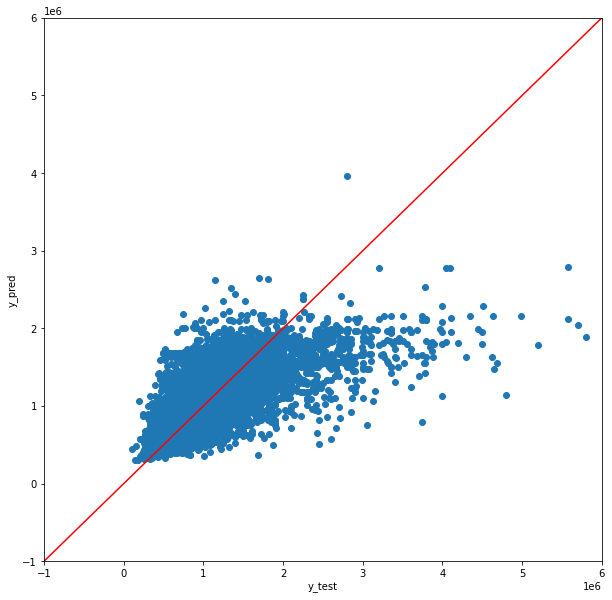

In [72]:
# Visualize y_test & y_pred
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.plot([-1000000, 6000000], [-1000000, 6000000], 'r-')
plt.xlim(-1000000, 6000000)
plt.ylim(-1000000, 6000000)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [34]:
# Model 4 (optional)
# Enter your code here:

In [35]:
#Random Forest Model
rf_reg = ensemble.RandomForestClassifier()
param_grid = {"n_estimators" : [10, 20, 30, 100, 1000],
              'criterion' : ['gini', 'entropy'],
              'max_depth' : [3, 9, 10, 27, 35],
              'max_features' : ['auto', 'sqrt', 'log2'] 
             }

gs_reg = GridSearchCV(rf_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
                                                                       
gs_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 9, 10, 27, 35],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 100, 1000]},
             scoring='neg_mean_squared_error')

In [36]:
print(gs_reg.best_score_)
print(gs_reg.best_params_)
print(gs_reg.best_estimator_)

-142530288668.11725
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 30}
RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=30)


In [73]:
#Final Model
# rf_reg = gs_reg.best_estimator_
rf_reg = ensemble.RandomForestClassifier(criterion='gini', max_depth=10, max_features='auto', n_estimators=30)
rf_reg.fit(X_train, y_train)

print('train_mae:', mean_absolute_error(rf_reg.predict(X_train), y_train), 
      '\n test_mae:', mean_absolute_error(rf_reg.predict(X_test), y_test))

train_mae: 197236.58101481444 
 test_mae: 210257.6353876329


In [74]:
y_pred = rf_reg.predict(X_test)
y_pred

array([1100000., 1700000.,  650000., ...,  900000.,  900000.,  490000.])

Text(0, 0.5, 'y_pred')

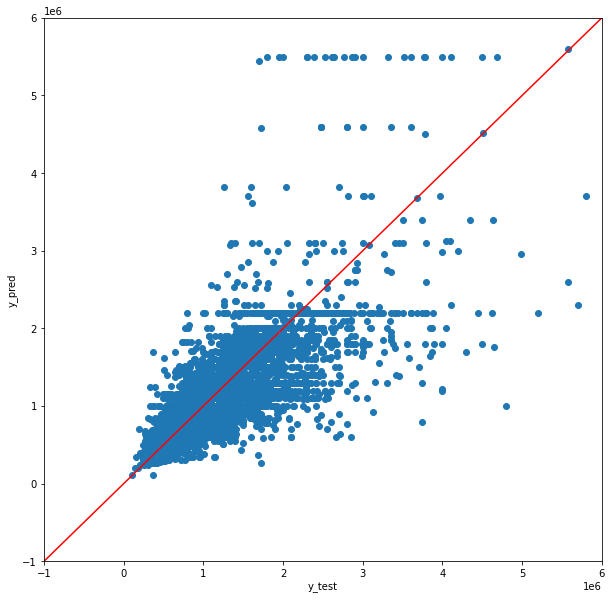

In [75]:
# Visualize y_test & y_pred
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.plot([-1000000, 6000000], [-1000000, 6000000], 'r-')
plt.xlim(-1000000, 6000000)
plt.ylim(-1000000, 6000000)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [76]:
# Model 5 (optional)
# Enter your code here:

In [77]:
import xgboost
xgb_reg = xgboost.XGBRegressor()

param_grid = {
        "n_estimators": [50,100,150,200,300], 
        "eta": [0.05, 0.1, 0,2, 0.3], 
        "max_depth": [3,4,5,6,7], 
        "colsample_bytree": [0.4,0.6,0.8,1], 
        "min_child_weight": [1,2,3,4] 
    }

gs_reg = GridSearchCV(xgb_reg, param_grid, n_jobs=-1, scoring='neg_mean_squared_error', cv=5)
gs_reg.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.6, 0.8, 1],
                         'eta': [0.05, 0.1, 0, 2, 0.3],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_child_weight': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 150, 200, 300]},
             scoring='neg_mean_squared_error')

In [78]:
print(gs_reg.best_score_)
print(gs_reg.best_params_)
print(gs_reg.best_estimator_)

-93228448801.14752
{'colsample_bytree': 1, 'eta': 0.1, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 300}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)


In [79]:
#Final Model
# xgb_reg = gs_reg.best_estimator_
xgb_reg = xgboost.XGBRegressor(n_estimators=300, eta=0.1, max_depth=5, colsample_bytree=1, min_child_weight=4)
xgb_reg.fit(X_train, y_train)

print('train_mae:', mean_absolute_error(xgb_reg.predict(X_train), y_train), 
      '\n test_mae:', mean_absolute_error(xgb_reg.predict(X_test), y_test))

train_mae: 173074.30132384633 
 test_mae: 175064.06582113914


In [80]:
y_pred = xgb_reg.predict(X_test)
y_pred

array([ 943386.4 , 2175515.2 ,  682054.2 , ...,  866717.56, 1270218.5 ,
        552863.25], dtype=float32)

Text(0, 0.5, 'y_pred')

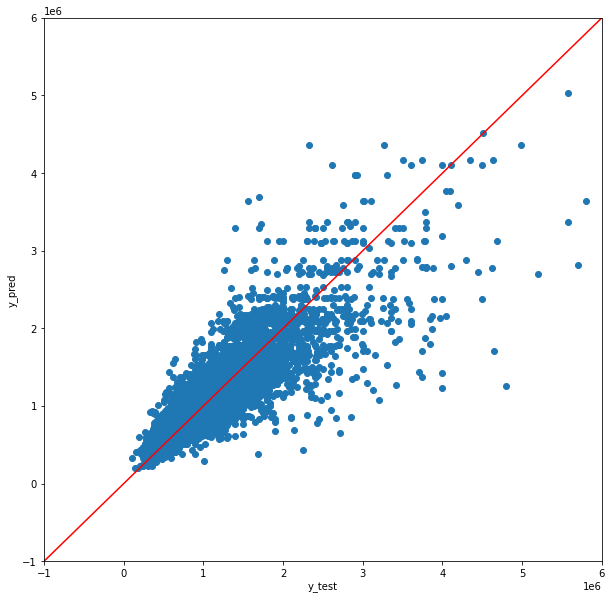

In [81]:
# Visualize y_test & y_pred
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.plot([-1000000, 6000000], [-1000000, 6000000], 'r-')
plt.xlim(-1000000, 6000000)
plt.ylim(-1000000, 6000000)
plt.xlabel('y_test')
plt.ylabel('y_pred')

### Step 3: Recommend the Best Model and Explain the Reasons

Enter your answer here:



In [ ]:
# Enter your code here (if required):




### Step 4: Use the best model to make prediction
Make prediction on the test data and provide the error analysis on the results (e.g. 95% confidence interval, visualization tools and etc.)

In [ ]:
# Enter your code here:



### Step 5: Save the Best Model for Future Use

In [ ]:
# Enter your code here:



 
 
## <center>End of Assignment<center>
---